# VÍ DỤ 9.15

In [2]:
library(foreign); library(AER) 
library(car); library(carData)
library(lmtest);library(zoo)
library(sandwich); library(dynlm)
library(dplyr);
# Cài đặt "systemfit), strargazer (nếu chưa cài đặt)
library(systemfit)
library(stargazer)


Warning message:
"package 'AER' was built under R version 4.2.2"
Loading required package: car

Warning message:
"package 'car' was built under R version 4.2.2"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.2.2"
Loading required package: lmtest

Warning message:
"package 'lmtest' was built under R version 4.2.2"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.2.2"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Warning message:
"package 'sandwich' was built under R version 4.2.2"
Loading required package: survival

Warning message:
"package 'dynlm' was built under R version 4.2.2"

Attaching package: 'dplyr'


The following object is masked from 'package:car':

    recode


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'packag

- CÁC BIẾN: Y-Thu nhập; I-Đầu tư; M - Cầu tiền; R - Lãi suất dài hạn; Data: ch10bt14.txt
- Hệ phương trình: 

$$\begin{cases}R=b_0+b_1*Y+b_2*M+b_3*M(-1)+u_1;\\ Y=a_0+a_1*R+a_2*I\end{cases}$$

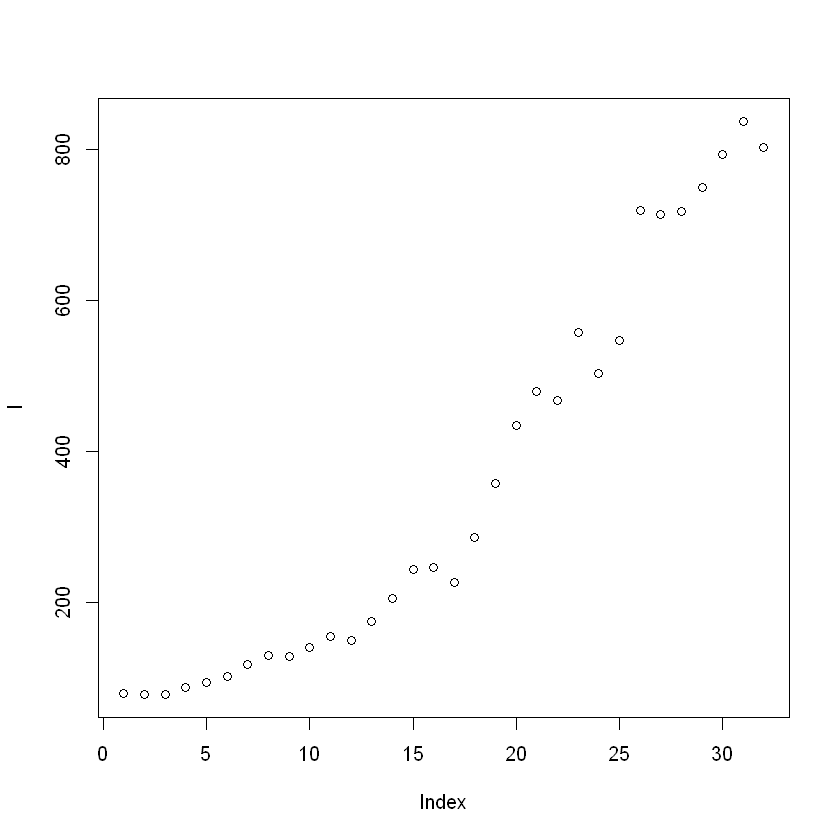

In [3]:
ch10bt14=read.table("ch10bt14.txt", header=TRUE)
ch10bt14=ts(ch10bt14, start(1959,1), frequency=1)
ch10bt14=as.data.frame(ch10bt14)
I=ch10bt14$I
plot(I)

In [4]:
R=ch10bt14$R
# plot(R)
M=ch10bt14$M
#plot(M)
Y=ch10bt14$Y
# plot(Y)

## Định dạng từng phương trình
- Phương trình 1: Định dạng đúng
- Phương trình 2: Vô định
- Phương pháp 2SLS

## Giai đoạn 1 - TÍNH BIẾN CÔNG CỤ
- Ước lượng cac phương trình rút gọn, ghi lại cac giá trị fitted của biến phụ thuộc
- Ước lượng  phương trình rút gọn thứ nhất
- Các biến công cụ: hệ số chặn, M, M(-1), I

In [5]:
reg1= dynlm(R~ M+lag(M,1)+I)
# Ghi lại hệ số của phương trình thứ nhất
bhat1=coef(reg1)
# Ghi lại các giá trị fitted của R
RHAT= fitted.values(reg1)

summary(reg1)


Time series regression with "numeric" data:
Start = 1, End = 31

Call:
dynlm(formula = R ~ M + lag(M, 1) + I)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6521 -1.2500 -0.4302  0.9560  4.1936 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.669155   0.672586   9.916  1.7e-10 ***
M           -0.027028   0.019736  -1.369    0.182    
lag(M, 1)   -0.002934   0.018731  -0.157    0.877    
I            0.032101   0.005656   5.675  5.0e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.631 on 27 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.6992,	Adjusted R-squared:  0.6658 
F-statistic: 20.92 on 3 and 27 DF,  p-value: 3.268e-07


In [6]:
# Ước lượng phương trình rút gọn thứ 2
reg2= dynlm(Y~ M+lag(M,1)+I)
# bhat2=coef(reg2)
YHAT= fitted.values(reg2)
summary(reg2)


Time series regression with "numeric" data:
Start = 1, End = 31

Call:
dynlm(formula = Y ~ M + lag(M, 1) + I)

Residuals:
    Min      1Q  Median      3Q     Max 
-252.51  -41.57  -12.83   10.39  277.72 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -276.988     43.160  -6.418 7.09e-07 ***
M              1.493      1.266   1.179   0.2488    
lag(M, 1)      2.788      1.202   2.320   0.0282 *  
I              2.577      0.363   7.101 1.24e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 104.7 on 27 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.996,	Adjusted R-squared:  0.9956 
F-statistic:  2265 on 3 and 27 DF,  p-value: < 2.2e-16


In [7]:
# Kết hợp YHAT, RHAT thành véc tơ b
b=cbind(YHAT,RHAT)
b

,YHAT,RHAT
2,526.1840,4.981948
3,532.7910,4.832589
4,575.1391,5.067419
5,605.0510,5.087399
6,652.2245,5.148504
7,724.9438,5.448500
8,784.0803,5.711028
9,806.3229,5.318954
10,889.4135,5.284300
11,978.1371,5.558100


In [8]:
# Trình bài kết quả hồi quy hai hàm trên 1 bảng
stargazer(reg1,reg2,type="text")


                                  Dependent variable:     
                              ----------------------------
                                    R              Y      
                                   (1)            (2)     
----------------------------------------------------------
M                                 -0.027         1.493    
                                 (0.020)        (1.266)   
                                                          
lag(M, 1)                         -0.003        2.788**   
                                 (0.019)        (1.202)   
                                                          
I                                0.032***      2.577***   
                                 (0.006)        (0.363)   
                                                          
Constant                         6.669***     -276.988*** 
                                 (0.673)       (43.160)   
                                                       

## Giai doan 2: Ước lượng các mô hình ban đầu

- Thay các biến RHAT cho R, YHAT cho Y ở vế phả các phương trình và ước lượng

In [11]:
# Đặt lại mẫu - resample
subsample=ch10bt14[2:32,1:4]
subsample

,I,R,M,Y
,<dbl>,<dbl>,<dbl>,<dbl>
2,78.7,3.98,140.7,513.3584
3,77.9,3.54,145.2,531.7493
4,87.9,3.47,147.9,571.5252
5,93.4,3.67,153.4,603.1098
6,101.7,4.03,160.4,647.9456
7,118.0,4.22,167.9,702.7588
8,130.4,5.23,172.1,769.6851
9,128.0,5.03,183.3,814.2869
10,139.9,5.68,197.5,889.3003


In [14]:
reg3=lm(R~YHAT+M+lag(M,1),data=subsample)
reg4=lm(Y~RHAT+I,data=subsample)
stargazer(reg3,reg4, type= "text")


                                  Dependent variable:               
                    ------------------------------------------------
                              R                        Y            
                             (1)                      (2)           
--------------------------------------------------------------------
YHAT                       0.012***                                 
                           (0.002)                                  
                                                                    
M                          -0.046**                                 
                           (0.022)                                  
                                                                    
lag(M, 1)                  -0.037*                                  
                           (0.019)                                  
                                                                    
RHAT                             

## RÚT GỌN HAI GIAI ĐOẠN TRÊN  - 2SLS REGRESION (CÁCH KHÁC, GỘP HAI GIAI ĐOẠN. CÁC BIẾN SAU  "|" LÀ CÁC BIẾN CÔNG CỤ )
- Máy tự động thực hiện hai giai đoạn. Có từ khóa để thực hiện 2SLS
- Ký tự, các biến sau  "|" là các biến công cụ.



In [5]:
reg31=dynlm(R~Y+M+lag(M,1)|M+I+lag(M,1))
reg41= dynlm(Y~R + I|M + lag(M,1)+I)
stargazer(reg31,reg41, type="text")


                                 Dependent variable:              
                    ----------------------------------------------
                              R                       Y           
                             (1)                     (2)          
------------------------------------------------------------------
Y                          0.012***                               
                           (0.002)                                
                                                                  
M                          -0.046**                               
                           (0.019)                                
                                                                  
lag(M, 1)                  -0.038**                               
                           (0.016)                                
                                                                  
R                                                -143.300*** 

### UOC LUONG HE PHUONG TRINH - JOINT ESTIMATION OF SYSTEM
- CÁCH KHÁC-THỰC HIỆN TRÊN THỰC TẾ 
- library(systemfit)
- ĐỊNH NGHĨA HỆ PHƯƠNG TRÌNH

In [15]:
eq.Laisuat= R~ Y+M+ lag(M,1)
eq.Thunhap= Y~ R+I
eq.system=list(eq.Thunhap, eq.Laisuat)
instrum=~M+lag(M,1)+I
my.sys=(systemfit(eq.system,inst=instrum,method="2SLS"))
summary(my.sys)


systemfit results 
method: 2SLS 

        N DF     SSR detRCov   OLS-R2 McElroy-R2
system 62 55 2541051  155127 0.966006   0.940775

     N DF         SSR         MSE      RMSE       R2   Adj R2
eq1 31 28 2.54100e+06 90749.86070 301.24718 0.966006 0.963578
eq2 31 27 5.45524e+01     2.02046   1.42143 0.771641 0.746268

The covariance matrix of the residuals
          eq1       eq2
eq1 90749.861 168.01599
eq2   168.016   2.02046

The correlations of the residuals
         eq1      eq2
eq1 1.000000 0.392376
eq2 0.392376 1.000000


2SLS estimates for 'eq1' (equation 1)
Model Formula: Y ~ R + I
Instruments: ~M + lag(M, 1) + I

               Estimate  Std. Error  t value   Pr(>|t|)    
(Intercept)  671.980523  212.156659  3.16738  0.0036976 ** 
R           -143.299833   40.598198 -3.52971  0.0014591 ** 
I              7.039408    0.366547 19.20465 < 2.22e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 301.247175 on 28 degrees of freedom
